# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами

Выполнил студент гр. 9382 Русинов Дмитрий, вариант 31.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \to \infty$.

## Основные теоретические положения

Линейная однородная система c периодическими коэффициентами:  
$X' = A(t)X,\ A(t + T) = A(t), t \ge 0$ (1)

Матрица $\Phi(t) = \{\phi_{ij}, i, j = 1, 2, ..., n \}$ называется фундаментальной матрицей системы (1), если все её столбцы являются линейно независимыми решениями этой системы.

Матрица $C$, удовлетворяющая условию $\Phi(t + T) = \Phi(t)C, \forall t \ge 0$, называется основной для фундаментальной матрицы $\Phi(t)$.

Спектральным радиусом матрицы $A$ называется максимум модуля её собственных чисел: $\rho(A) = max|\lambda_j|, 0 \le j \le n$

## Постановка задачи

Дано дифференциальное уравнение:\
$x'' + a(p, t)x = 0, a(p, t) = p + b(t), b(t + T) = b(t)$,\
где $p$ – параметр.

Данное уравнение сводится к системе двух уравнений $1$-го порядка:\
$\begin{cases}
    u_1' = u_2\\
    u_2' = -a(p, t)u_1
 \end{cases}$
 
Здесь $u_1(t) = x(t), u_2(t) = x'(t)$.

Необходимо провести исследование устойчивости однородного линейного уравнения.

## Выполнение работы

In [83]:
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
import numpy as np

Алгоритм итерируется по значениям $p$ от $1$ до $1.5$ с шагом $0.0001$. Для каждого значения $p$ вычисляется фундаментальная матрица с использованием численного интегрирования с данными начальными векторами. Решение используется для вычисления основной матрицы. Наибольшее по модулю собственное число основной матрицы - это и есть её спектральный радиус. Затем по полученным значениям спектрального радиуса происходит построение графика, по которому можно наблюдать границу системы между зонами устойчивости и неустойчивости.

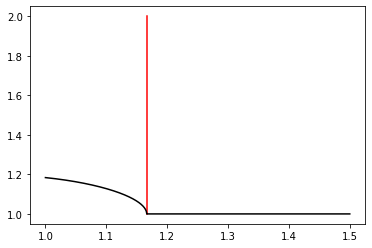

p0 = 1.1662999999999817


In [84]:
v1 = [1, 0]
v2 = [0, 1]

start = 1
end = 1.5
interval = 0.0001

pr = np.arange(start, end, interval)
T = math.pi
tr = np.arange(start, T, T / ((end - start) / interval) )
result = []

p0 = None
for p in pr:
    def system(x, t):
        return [x[1], -(p + np.log(3 - 2 * np.sin(2 * t))) * x[0]]

    C = np.array([odeint(system, v1, tr)[-1], odeint(system, v2, tr)[-1]])
    result.append(np.max(np.abs(np.linalg.eigvals(C))))

p0 = pr[ list(filter(lambda x: result[x] > 1, range(len(result))))[-1] ]
plt.plot([p0, p0], [1, 2], color="red", label="p0")
plt.plot(pr, result, color="black")
plt.show()

print("p0 =", p0)

## Выводы

Было проведено исследование однородного линейного уравнения с периодическими коэффициентами. Была определена граница между зонами устойчивости и неустойчивости.